In [183]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
np.random.seed(1)

In [184]:
def Zero_pad(X, pad):
    X_pad = np.pad(x, ((0, 0 ), (0,0),(0,0)), 'constant', constant_values = (0,0) )
    return X_pad

The input is desired to be 32x32

And since the number of filters = 4

Therefore No. of channels in input = No. of filters = 4

In [185]:
np.random.seed(1)
x = np.random.randn(4, 32, 32)

In [186]:
print(x)

[[[ 1.62434536 -0.61175641 -0.52817175 ...,  0.53035547 -0.69166075
   -0.39675353]
  [-0.6871727  -0.84520564 -0.67124613 ...,  1.25286816  0.51292982
   -0.29809284]
  [ 0.48851815 -0.07557171  1.13162939 ..., -0.63873041  0.42349435
    0.07734007]
  ..., 
  [ 0.50142959 -0.47861407  1.63169151 ...,  0.39233491  0.44838065
    1.1253235 ]
  [ 0.10405339  0.52800342 -0.31456386 ..., -0.40724002  0.16056499
   -0.12014998]
  [ 0.38560229  0.71829074  1.2911889  ..., -0.52137639 -0.23011406
   -0.49101443]]

 [[ 0.67930114  1.42754695  0.03619746 ..., -0.58893118  0.85178964
    1.6346025 ]
  [ 0.27915545  1.64055365  0.41087294 ..., -0.40178883 -0.19993939
    0.00738898]
  [ 0.27566408 -1.7632498   1.38797381 ...,  0.32706841 -0.37911961
    1.79791937]
  ..., 
  [-0.50966874  0.42377343 -1.1149675  ...,  2.1723328   1.17707022
    1.64005737]
  [-0.41787062 -0.89687959 -1.07028829 ...,  0.16893767  0.3186247
   -0.27337714]
  [ 1.47641399 -2.10349278 -0.53283196 ..., -0.08339327  0.

The activation function required is ReLU

Hence defining ReLU

In [187]:
def relu(y):
    return abs(y)*(y>0)

Plotting the image

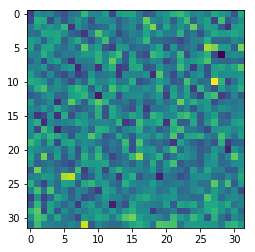

In [188]:
plt.imshow(x[2])

# Defining convolution function

In [189]:
def conv_single_step(a_slice_prev, W):
    s = np.multiply(a_slice_prev, W)
    Z = np.sum(s)
    return Z

In [190]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 3, 3)
W = np.random.randn(4, 3, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W)
print("Z =", Z)

Z = -8.30814939604


# defining forward function

In [191]:
def conv_forward(a_prev, W, b, hparameters):
    
    a_prev = x
    (n_C_prev, n_H_prev, n_W_prev) = a_prev.shape
    print(a_prev.shape)
    print(n_C_prev)
    print(n_H_prev)
    print(n_W_prev)

    
    W = np.random.randn(4,3,3)
    
    n_C = 4
    f = 3
    
    stride = hparameters["stride"]
    pad = hparameters["pad"]

    
    n_H = np.int(math.floor((n_H_prev+2*pad-f)/stride+1))  
    n_W = np.int(math.floor((n_W_prev+2*pad-f)/stride+1))

    
    Z = np.random.rand(n_C,n_H,n_W)
   
                           
    for h in range(n_H):                           
        for w in range(n_W):                    
            for c in range(n_C):                                  
                   
                vert_start = stride*h
                vert_end = vert_start+f
                horiz_start = stride*w
                horiz_end = horiz_start+f

                   
                a_slice_prev = a_prev[:,vert_start:vert_end,horiz_start:horiz_end]
                #print(a_slice_prev.shape)
                    
                Z[c, h, w] = conv_single_step(a_slice_prev,W) 
                #print(Z.shape)
    

    
    assert(Z.shape == (n_C,n_H, n_W))

    cache = (a_prev, W, b, hparameters)

    return Z, cache

np.random.seed(1)
a_prev = x
W = np.random.randn(3,3,4,4)
b = np.random.randn(4,1,1,1)
hparameters = {"pad" : 0,
               "stride": 2}

Z, cache_conv = conv_forward(a_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print(Z.shape)
#print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv shape =", cache_conv)

(4, 32, 32)
4
32
32
Z's mean = -0.312854710957
(4, 15, 15)
cache_conv shape = (array([[[ 1.62434536, -0.61175641, -0.52817175, ...,  0.53035547,
         -0.69166075, -0.39675353],
        [-0.6871727 , -0.84520564, -0.67124613, ...,  1.25286816,
          0.51292982, -0.29809284],
        [ 0.48851815, -0.07557171,  1.13162939, ..., -0.63873041,
          0.42349435,  0.07734007],
        ..., 
        [ 0.50142959, -0.47861407,  1.63169151, ...,  0.39233491,
          0.44838065,  1.1253235 ],
        [ 0.10405339,  0.52800342, -0.31456386, ..., -0.40724002,
          0.16056499, -0.12014998],
        [ 0.38560229,  0.71829074,  1.2911889 , ..., -0.52137639,
         -0.23011406, -0.49101443]],

       [[ 0.67930114,  1.42754695,  0.03619746, ..., -0.58893118,
          0.85178964,  1.6346025 ],
        [ 0.27915545,  1.64055365,  0.41087294, ..., -0.40178883,
         -0.19993939,  0.00738898],
        [ 0.27566408, -1.7632498 ,  1.38797381, ...,  0.32706841,
         -0.37911961,  

Applying activation ReLU to the output of convolved matrix 

In [192]:
a = relu(Z)
print(a)

[[[  0.           0.           1.96594511   0.           4.06020803   0.
     3.19815939   5.39047332   0.           3.02995085  12.13117112
     9.59773635   7.70038112  11.87343841   0.        ]
  [  0.           0.3465094    0.           0.           6.76870924   0.
     0.           3.81705639   5.54875793   0.04411788   4.17638462   0.
     7.10057106   0.           6.49481071]
  [  0.           5.85283464   0.           3.45274508   0.           5.2825857
     2.98655336   0.           0.           0.           1.81405273
     3.67990367   5.5686297    0.           0.        ]
  [ 10.59479937   3.07978881   0.          10.77966123   0.           0.
     0.           0.           6.46504555   0.           9.58630924
    11.48181706   0.           0.          10.98917355]
  [  2.76959632   3.33720092   2.88937838   0.           0.           9.78004262
     0.           2.18230732   0.           1.66944232   8.64886477   0.
     0.33496785   1.43960868   2.26256651]
  [  0.         

Reshaping the activated layer in order to fully connect

In [193]:
q = np.reshape(a, (900,1))

In [194]:
W1 = np.random.randn(1, 10)
Z2 = np.dot(q, W1)
print (Z2.shape)
print(Z2)

(900, 10)
[[  0.           0.          -0.         ...,   0.          -0.          -0.        ]
 [  0.           0.          -0.         ...,   0.          -0.          -0.        ]
 [  2.28302393   2.10349352  -2.05546294 ...,   0.59363687  -0.77593825
   -2.30372078]
 ..., 
 [ 12.15514624  11.19930063 -10.94357896 ...,   3.16060771  -4.13120632
  -12.26533925]
 [  0.           0.          -0.         ...,   0.          -0.          -0.        ]
 [  0.           0.          -0.         ...,   0.          -0.          -0.        ]]


Output in form od 10x1

In [195]:
W2 = np.random.randn(1,900)
output = (np.dot(W2, Z2)).T
print(output.shape)
print(output)

(10, 1)
[[-11.16045989]
 [-10.28283354]
 [ 10.04803822]
 [ -3.41443842]
 [ -7.25964549]
 [ -6.73674264]
 [  1.9118753 ]
 [ -2.90196718]
 [  3.79313926]
 [ 11.26163552]]


# Backward Propagation

In [196]:
def conv_backward(dZ, cache):
    
    (a_prev, W, b, hparameters) = cache

    
    (n_C_prev,n_H_prev, n_W_prev) = a_prev.shape

   
    (n_C, f, f) = W.shape

    
    stride = hparameters["stride"]
    pad = hparameters["pad"]

    
    (n_C, n_H, n_W) = dZ.shape

    
    dA_prev = np.zeros((n_C_prev, n_H_prev, n_W_prev))                           
    dW = np.zeros((n_C, f, f))
    db = np.zeros((n_C, 1, 1))

    
    A_prev_pad =Zero_pad(a_prev, pad)
    dA_prev_pad = Zero_pad(dA_prev, pad)

    for h in range(n_H):                   
        for w in range(n_W):               
            for c in range(n_C):           

                vert_start = stride * h
                vert_end = vert_start + f
                horiz_start = stride * w
                horiz_end = horiz_start + f

                    
                a_slice = A_prev_pad[:, vert_start:vert_end, horiz_start:horiz_end]

                    
                dA_prev_pad[:, vert_start:vert_end, horiz_start:horiz_end] += W[:,:,:] * dZ[c, h, w]
                dW[:,:,:] += a_slice * dZ[c, h, w]
                db[c, :,:] += dZ[c, h, w]

        
    dA_prev[:, :, :] = dA_prev_pad[:,: , :]
    
    assert(dA_prev.shape == (n_C_prev, n_H_prev, n_W_prev))

    return dA_prev, dW, db


In [197]:
np.random.seed(1)
dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

dA_mean = -0.345192716303
dW_mean = 80.071022397
db_mean = -70.3923099652


In [198]:
print(dA.shape)
print(dW.shape)
print(db.shape)

(4, 32, 32)
(4, 3, 3)
(4, 1, 1)


In [200]:
print(dA)
print(dW)
print(db)

[[[ -1.31499194e-01  -5.76651865e+00  -3.76540076e+00 ...,  -9.75638591e+00
     3.98211329e+00  -3.96753527e-01]
  [  1.77012001e+01  -8.69061299e+00   4.12423110e+01 ...,  -1.44032713e+01
    -3.24470697e+01  -2.98092835e-01]
  [ -3.74296060e+00  -1.95611457e+00  -6.90922738e+00 ...,   1.86028792e+01
    -5.57674406e+00   7.73400683e-02]
  ..., 
  [  8.26797552e+01  -3.55400328e+01  -9.52882506e+01 ...,  -2.11118441e+01
    -4.48231711e+01   1.12532350e+00]
  [ -1.47924590e+01   3.90834748e+00   8.47922430e+00 ...,   1.66602245e+00
     2.98503814e+00  -1.20149976e-01]
  [  3.85602292e-01   7.18290736e-01   1.29118890e+00 ...,  -5.21376385e-01
    -2.30114063e-01  -4.91014433e-01]]

 [[  1.57842175e+00   1.29606768e+00   1.13669079e+01 ...,  -8.51308601e-01
     1.77617489e+01   1.63460250e+00]
  [  4.18435432e+00   9.17029600e+00   1.09408751e+01 ...,   1.46244158e+01
    -3.94959488e+00   7.38898371e-03]
  [  2.97590427e+00  -5.57044158e+00   1.39957543e+01 ...,  -6.68398483e+00
  